<a href="https://colab.research.google.com/github/AngelicaCeDi/Analitica-3-caso-salud/blob/main/B_Analisis_exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IMPORTAR PAQUETES
import sqlite3 as sql
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from matplotlib import pyplot
from matplotlib import colorbar
import os
os.getcwd()

'/content'

In [2]:
!git clone "https://github.com/AngelicaCeDi/Analitica-3-Caso-salud.git" #Clonar la carpeta de github para traer datos a colab.

Cloning into 'Analitica-3-Caso-salud'...
remote: Enumerating objects: 57, done.
remote: Total 57 (delta 0), reused 0 (delta 0), pack-reused 57
Unpacking objects: 100% (57/57), 1.50 MiB | 2.55 MiB/s, done.


In [3]:
os.chdir('/content') 

In [4]:
#Conexión con la base de datos.
conn= sql.connect("/content/Analitica-3-Caso-salud/strokeb.db") 
cur=conn.cursor()

In [5]:
#Exploramos que tablas que hay en el sql. 
cur.execute("SELECT name FROM sqlite_master where type='table' ")
cur.fetchall()
     

[('stroke',)]

In [6]:
pd.read_sql("SELECT* FROM stroke", conn)

,index,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,1,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
2,2,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
3,3,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
4,4,1,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4976,4976,1,41.0,0,0,0,Private,0,70.15,29.8,formerly smoked,0
4977,4977,1,40.0,0,0,1,Private,1,191.15,31.1,smokes,0
4978,4978,0,45.0,1,0,1,Govt_job,0,95.02,31.8,smokes,0
4979,4979,1,40.0,0,0,1,Private,0,83.94,30.0,smokes,0


<ipython-input-8-75a262cec691>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap='crest');


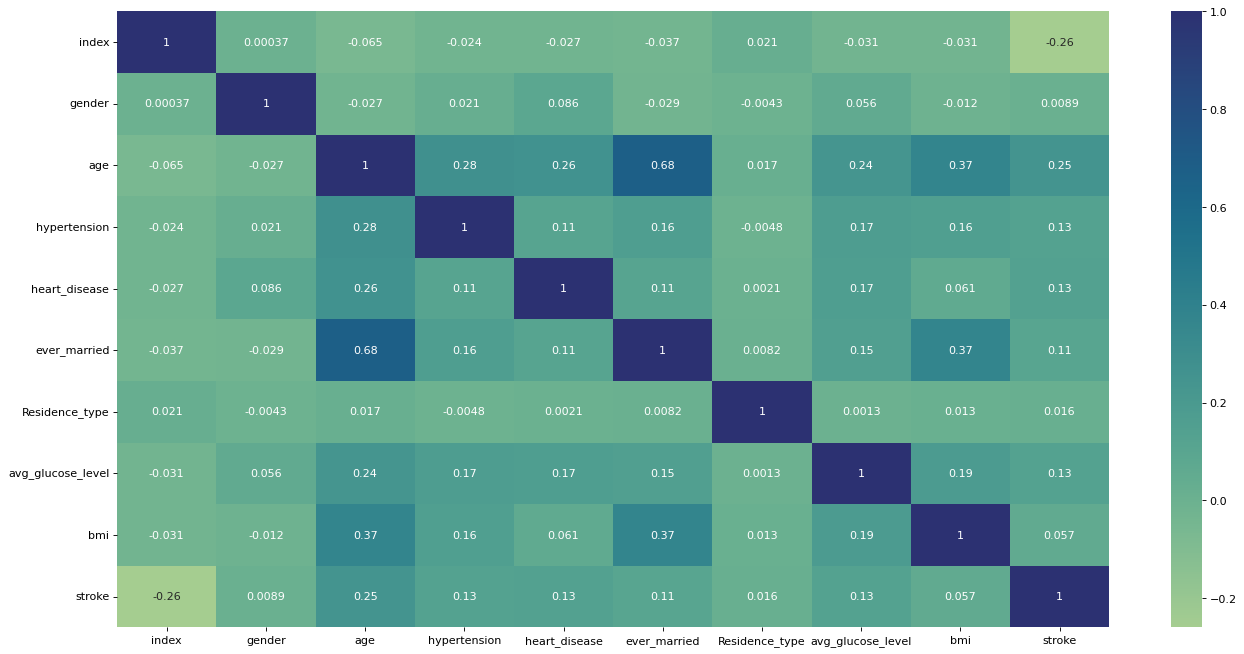

In [8]:
#Analisis de correlación

from matplotlib.pyplot import figure
df=pd.read_sql("SELECT* FROM stroke", conn)
figure(figsize=(20, 10), dpi=80);
sns.heatmap(df.corr(), annot = True, cmap='crest'); 

Todas las variables tienen correlaciones debiles de entre -0.26 y 0.37, las variables que más tienen correlación es la edad y el bmi con una correlacón positiva (cuando una aumenta la otra tambien) muy debil de 0.37.

In [9]:
# Número de registros por categoria.
pd.read_sql("""select stroke, count(stroke) from stroke group by stroke order by count(stroke) desc """, conn)

,stroke,count(stroke)
0,0,4733
1,1,248


In [11]:
#Generos de los afectados.
pd.read_sql("""select gender,stroke, count(gender) from stroke where stroke =1 group by gender """, conn)

,gender,stroke,count(gender)
0,0,1,140
1,1,1,108


In [12]:
age=pd.read_sql("""select age,stroke from stroke where stroke=1 """, conn)
# crear gráfica
fig = px.bar(age, x = 'age',y='stroke', title= '<b>Edades que más presentan derrames',
             color_discrete_sequence=px.colors.sequential.Aggrnyl)

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Edad',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [13]:
#Pacientes con hipertención y que presentaron derrames cerebrales.
pd.read_sql("""select stroke, count(hypertension) from stroke where stroke=1 and hypertension=1  """, conn)

,stroke,count(hypertension)
0,1,66


In [14]:
#Pacientes que tuvieron ataque al corazón y presentaron derrame cerebral.
pd.read_sql("""select stroke, count(heart_disease) from stroke where stroke=1 and heart_disease=1  """, conn)

,stroke,count(heart_disease)
0,1,47


In [15]:
#Estatus marital (casados o no) de los pacientes que presentaron derrame cerebral
status=pd.read_sql("""select ever_married, count(stroke) from stroke where stroke=1 group by ever_married  """, conn)
# crear gráfica:
fig = px.pie(status, values = 'count(stroke)', names ='ever_married',
             title= '<b>Estatus marital pacientes que presentaron derrame cerebral<b>',
             color_discrete_sequence=px.colors.sequential.Aggrnyl)

fig.show()

In [16]:
#Tipo de trabajo de los pacientes que presentaron derrame cerebral.
job=pd.read_sql("""select work_type, count(stroke) from stroke where stroke=1 group by work_type  """, conn)
# crear gráfica
fig = px.bar(job, x = 'count(stroke)', y='work_type', barmode = 'group', 
             title= '<b>Tipo de trabajo de los pacientes positivos a derrame',
             color_discrete_sequence=px.colors.sequential.Aggrnyl)

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Número de pacientes',
    yaxis_title = 'Tipo de trabajo',
    template = 'simple_white',
    title_x = 0.5)
fig.show()

In [17]:
#Estatus de fumador de los pacientes que presentaron derrame cerebral
smoke=pd.read_sql("""select 	smoking_status, count(stroke) from stroke where stroke=1 group by smoking_status """, conn)
# crear gráfica
fig = px.bar(smoke, x = 'count(stroke)', y='smoking_status', barmode = 'group', 
             title= '<b>Estatus de fumador de los pacientes que presentaron derrame',
             color_discrete_sequence=px.colors.sequential.Aggrnyl)

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Número de pacientes',
    yaxis_title = 'Estatus de fumador',
    template = 'simple_white',
    title_x = 0.5)
fig.show()

In [18]:
#Residencia de los pacientes que presentaron derrame cerebral
resi=pd.read_sql("""select Residence_type, count(stroke) from stroke where stroke=1 group by Residence_type """, conn)
# crear gráfica
fig = px.bar(resi, x = 'count(stroke)', y='Residence_type', barmode = 'group', 
             title= '<b>Residencia de los pacientes que presentaron derrame',
             color_discrete_sequence=px.colors.sequential.Aggrnyl)

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Número de pacientes',
    yaxis_title = 'Residencia',
    template = 'simple_white',
    title_x = 0.5)
fig.show()

In [19]:
#Nivel de glucosa de los pacientes.
gluc=pd.read_sql("""select avg_glucose_level,stroke from stroke """, conn)

# Creamos boxplot
fig = px.box(gluc, x="stroke", y="avg_glucose_level",points="all",color="stroke")
fig.show()

In [20]:
#Indice de masa corporal de los pacientes.
bmi=pd.read_sql("""select bmi,stroke from stroke """, conn)

# Creamos boxplot
fig = px.box(bmi, x="stroke", y="bmi",points="all",color="stroke")
fig.show()